**Import libraries and load the file.**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [7]:
# df = pd.read_csv('/bin/eyegaze/sample.tsv', sep='\t')
df = pd.read_csv('sample.tsv', sep='\t')
df.head()

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
0,224429,3688.82373,1203285459570,0.61778,1.04122,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30657,0.57754,7.52634,1.0,1,0.67805,0.53920,8.87684,1.0,1,-0.08589,-0.00695,0.85153,0.00275,1,0.0451,-0.01172,0.85617,0.00348,1,0.32292,0.26019,0,0
1,224430,3688.83984,1203285619107,0.53233,0.93970,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30639,0.57681,7.69552,1.0,1,0.67817,0.53960,8.96964,1.0,1,-0.08589,-0.00695,0.85153,0.00302,1,0.0451,-0.01172,0.85617,0.00346,1,0.32292,0.26019,0,0
2,224431,3688.85620,1203285782582,0.32598,-0.82726,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.11962,-2.59421,1,0.11962,-2.59421,1,0.30570,0.57789,6.93798,1.0,1,0.67569,0.54106,9.03034,1.0,1,-0.08589,-0.00695,0.85153,0.00268,1,0.0451,-0.01172,0.85617,0.00274,1,0.32292,0.26019,0,0
3,224432,3688.87231,1203285946108,0.36009,-0.14849,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30551,0.57881,7.33709,1.0,1,0.67781,0.53975,8.79860,1.0,1,-0.08589,-0.00695,0.85153,0.00279,1,0.0451,-0.01172,0.85617,0.00367,1,0.32292,0.26019,0,0
4,224433,3688.88892,1203286111336,0.32542,-0.05872,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30543,0.57869,6.89567,1.0,1,0.67807,0.53987,8.71931,1.0,1,-0.08589,-0.00695,0.85153,0.00283,1,0.0451,-0.01172,0.85617,0.00374,1,0.32292,0.26019,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CNT        3901 non-null   int64  
 1   TIME       3901 non-null   float64
 2   TIME_TICK  3901 non-null   int64  
 3   FPOGX      3901 non-null   float64
 4   FPOGY      3901 non-null   float64
 5   FPOGS      3901 non-null   float64
 6   FPOGD      3901 non-null   float64
 7   FPOGID     3901 non-null   int64  
 8   FPOGV      3901 non-null   int64  
 9   LPOGX      3901 non-null   float64
 10  LPOGY      3901 non-null   float64
 11  LPOGV      3901 non-null   int64  
 12  RPOGX      3901 non-null   float64
 13  RPOGY      3901 non-null   float64
 14  RPOGV      3901 non-null   int64  
 15  BPOGX      3901 non-null   float64
 16  BPOGY      3901 non-null   float64
 17  BPOGV      3901 non-null   int64  
 18  LPCX       3901 non-null   float64
 19  LPCY       3901 non-null   float64
 20  LPD     

**Redundant features**

In [19]:
df.columns

Index(['TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID',
       'FPOGV', 'LPOGX', 'LPOGY', 'LPOGV', 'RPOGX', 'RPOGY', 'RPOGV', 'BPOGX',
       'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX', 'RPCY',
       'RPD', 'RPS', 'RPV', 'LEYEX', 'LEYEY', 'LEYEZ', 'LPUPILD', 'LPUPILV',
       'REYEX', 'REYEY', 'REYEZ', 'RPUPILD', 'RPUPILV', 'CX', 'CY', 'CS'],
      dtype='object')

Now if we observe carefully, there are some columns that obviously do not affect results like ‘CNT’ , ‘USER'. We can check their meanings and and get rid of these redundant columns.

**Terms Dictionary**

In [22]:
# We have made a summary of all short-handed terms and their explanation in a excel sheet, now we load it
df_term = pd.read_excel("log_data_dictionary.xlsx", names=["term", "descr"]).dropna(subset=['descr'])
pd.set_option('display.max_colwidth', None)

# tool function to loop up some short-handed terms
def explain_term(terms):
  for t in terms:
    print("{}: {}".format(t, df_term.query("term==@t")['descr'].to_string(index=False)))

#check some suspected redundant terms
explain_term(['CNT', 'USER',])

CNT: Server counter id. The counter data variable is incremented by 1 for each data record sent by the server. Useful to determine if any data packets are missed by the client
USER: Name/id defined by user


In [24]:
# we drop irrelevant features CNT and USER
df = df.drop(['CNT', 'USER',], axis = 1)
df.head()

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
0,3688.82373,1203285459570,0.61778,1.04122,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30657,0.57754,7.52634,1.0,1,0.67805,0.53920,8.87684,1.0,1,-0.08589,-0.00695,0.85153,0.00275,1,0.0451,-0.01172,0.85617,0.00348,1,0.32292,0.26019,0
1,3688.83984,1203285619107,0.53233,0.93970,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30639,0.57681,7.69552,1.0,1,0.67817,0.53960,8.96964,1.0,1,-0.08589,-0.00695,0.85153,0.00302,1,0.0451,-0.01172,0.85617,0.00346,1,0.32292,0.26019,0
2,3688.85620,1203285782582,0.32598,-0.82726,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.11962,-2.59421,1,0.11962,-2.59421,1,0.30570,0.57789,6.93798,1.0,1,0.67569,0.54106,9.03034,1.0,1,-0.08589,-0.00695,0.85153,0.00268,1,0.0451,-0.01172,0.85617,0.00274,1,0.32292,0.26019,0
3,3688.87231,1203285946108,0.36009,-0.14849,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30551,0.57881,7.33709,1.0,1,0.67781,0.53975,8.79860,1.0,1,-0.08589,-0.00695,0.85153,0.00279,1,0.0451,-0.01172,0.85617,0.00367,1,0.32292,0.26019,0
4,3688.88892,1203286111336,0.32542,-0.05872,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30543,0.57869,6.89567,1.0,1,0.67807,0.53987,8.71931,1.0,1,-0.08589,-0.00695,0.85153,0.00283,1,0.0451,-0.01172,0.85617,0.00374,1,0.32292,0.26019,0


**Duplicate value**

In [16]:
# Check whether there are duplicates in our data.
df.duplicated().sum()

0

On running this code, we see that there are no duplicates to take care of.

**Missing value** (for fixation points)

In [45]:
# Check whether there are missing values in our data.
explain_term(['FPOGX'])

# check that records are miss both FPOGX and FPOGY values, or not missing either
if sum(np.where((df['FPOGX'] == 0.0) != (df['FPOGY'] == 0.0), 1, 0)):
  print("FPOGX and FPOGY are NOT consistent in missing values")
else:
  print("consistency checked")

missing_df = df[(df['FPOGX'] == 0.0)]
missing_df

FPOGX: X-coordinate of fixation POG, as a percentage of the screen width
consistency checked


,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
13,3689.03662,1203287588860,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0
14,3689.05322,1203287754931,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0
15,3689.06958,1203287918669,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0
16,3689.08618,1203288082609,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0
17,3689.10254,1203288246529,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30596,0.58006,6.23690,1.0,1,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00247,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,3749.62158,1203893437831,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0
3641,3749.63354,1203893557871,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0
3642,3749.64990,1203893719918,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0
3643,3749.66772,1203893899312,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0


In [ ]:
missing_df.describe()

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
count,460.000000,4.600000e+02,460.0,460.0,460.000000,460.000000,460.000000,460.0,460.000000,460.000000,460.0,460.000000,460.000000,460.0,460.000000,460.000000,460.0,460.000000,460.000000,460.000000,460.0,460.000000,460.000000,460.000000,460.000000,460.0,460.000000,460.000000,460.000000,460.000000,460.000000,460.0,460.000000,460.000000,460.000000,460.000000,460.000000,4.600000e+02,4.600000e+02,460.0
mean,3720.979494,1.203607e+12,0.0,0.0,3720.295570,0.205548,1835.163043,0.0,0.442703,1.147159,0.0,0.514738,0.605197,0.0,0.402906,1.032479,0.0,0.313356,0.541536,21.157585,1.0,0.504348,0.674833,0.556231,25.157061,1.0,0.523913,-0.050625,-0.009702,0.685999,0.006914,1.0,0.058416,-0.010768,0.793723,0.006589,0.941304,3.229200e-01,2.601900e-01,0.0
std,18.026372,1.802637e+08,0.0,0.0,18.060309,0.096602,45.242960,0.0,1.011714,1.127346,0.0,0.711434,0.570677,0.0,1.085390,0.951522,0.0,0.171147,0.114007,10.227840,0.0,0.500525,0.126553,0.158807,13.858201,0.0,0.499972,0.025984,0.004531,0.222350,0.003454,0.0,0.019758,0.016193,0.073345,0.003266,0.235310,6.112875e-16,2.056149e-15,0.0
min,3689.036620,1.203288e+12,0.0,0.0,3688.034670,0.049320,1754.000000,0.0,-2.228600,-0.498240,0.0,-0.005310,-0.211200,0.0,-2.228600,-0.498240,0.0,0.068160,0.286690,5.760900,1.0,0.000000,0.489090,0.371030,6.796800,1.0,0.000000,-0.085890,-0.015720,0.316580,0.001750,1.0,0.045100,-0.075420,0.772400,0.001950,0.000000,3.229200e-01,2.601900e-01,0.0
25%,3705.905580,1.203456e+12,0.0,0.0,3704.594970,0.098630,1797.000000,0.0,0.243960,0.717430,0.0,0.177070,-0.124530,0.0,0.177070,0.716550,0.0,0.174350,0.422180,11.473980,1.0,0.000000,0.628397,0.464630,9.496660,1.0,0.000000,-0.085890,-0.015720,0.316580,0.003230,1.0,0.053870,-0.006520,0.772400,0.003590,1.000000,3.229200e-01,2.601900e-01,0.0
50%,3719.282470,1.203590e+12,0.0,0.0,3719.019530,0.254640,1831.000000,0.0,0.439680,0.913340,0.0,0.421860,0.670890,0.0,0.319090,0.882810,0.0,0.272940,0.579880,21.602390,1.0,1.000000,0.645865,0.478255,31.790890,1.0,1.000000,-0.042990,-0.006950,0.821820,0.008120,1.0,0.053870,-0.006520,0.772400,0.006290,1.000000,3.229200e-01,2.601900e-01,0.0
75%,3735.600340,1.203753e+12,0.0,0.0,3735.316890,0.279540,1871.000000,0.0,0.997540,1.346725,0.0,0.685330,1.156820,0.0,0.574307,1.156820,0.0,0.315782,0.596730,23.829410,1.0,1.000000,0.666320,0.596670,38.608035,1.0,1.000000,-0.021120,-0.004810,0.851530,0.008680,1.0,0.053870,-0.006520,0.772400,0.009450,1.000000,3.229200e-01,2.601900e-01,0.0
max,3749.708980,1.203894e+12,0.0,0.0,3748.476560,0.361330,1906.000000,0.0,3.505830,6.040310,0.0,4.026960,1.942520,0.0,4.026960,6.040310,0.0,0.686610,0.711910,42.796930,1.0,1.000000,0.959520,0.901660,41.788460,1.0,1.000000,-0.021120,-0.004810,0.851530,0.025680,1.0,0.137160,-0.006520,1.079840,0.023190,1.000000,3.229200e-01,2.601900e-01,0.0


Some data can't be retrieved during blinking, so missing value(0.0) exists.

FPOGID: The fixation POG ID number


Text(0, 0.5, 'POG ID')

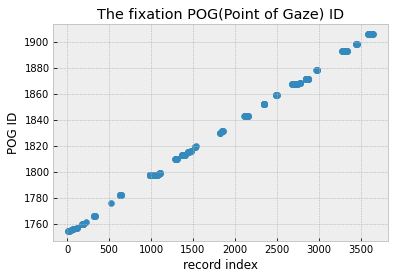

In [94]:
explain_term(['FPOGID',])
plt.scatter(missing_df.index,missing_df['FPOGID'])
plt.title("The fixation POG(Point of Gaze) ID")
plt.xlabel("record index")
plt.ylabel("POG ID")

From the above figure of 'FPOGID', we can compute the frequence of blinking via regular intervals.
The frequence of blinking = total time / the count of blinking. 

In [26]:
missing_df

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
13,224442,3689.03662,1203287588860,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0,0
14,224443,3689.05322,1203287754931,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0,0
15,224444,3689.06958,1203287918669,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0,0
16,224445,3689.08618,1203288082609,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30481,0.57937,6.80390,1.0,0,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00267,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0,0
17,224446,3689.10254,1203288246529,0.0,0.0,3688.03467,0.09863,1754,0,-2.11646,6.04031,0,0.64409,1.24761,0,-2.11646,6.04031,0,0.30596,0.58006,6.23690,1.0,1,0.67836,0.53952,7.94480,1.0,0,-0.08589,-0.00695,0.85153,0.00247,1,0.04510,-0.01172,0.85617,0.00343,1,0.32292,0.26019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,228131,3749.62158,1203893437831,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0,0
3641,228132,3749.63354,1203893557871,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0,0
3642,228133,3749.64990,1203893719918,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0,0
3643,228134,3749.66772,1203893899312,0.0,0.0,3748.47656,0.26294,1906,0,-0.13194,0.36571,0,4.02696,-0.21120,0,4.02696,-0.21120,0,0.17435,0.41630,39.95628,1.0,1,0.53425,0.66599,8.99718,1.0,0,-0.04299,-0.01572,0.82182,0.00933,1,0.13716,-0.07542,1.07984,0.00219,0,0.32292,0.26019,0,0


In [27]:
# Total time
missing_df['TIME'].iloc[-1] - missing_df['TIME'].iloc[0]
# 3749.7 - 3689.0 = 60.7(s)

60.672360000000026

In [ ]:
# The count of blinking.
missing_df['FPOGID'].nunique()

30

The frequence of blinking = 60.7 / 30 = 2.02

**Check the statistics.**

In [ ]:
df.describe() # Understand the statistics of given data.

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
count,3901.000000,3.901000e+03,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3.901000e+03,3.901000e+03,3901.000000
mean,3721.101438,1.203608e+12,0.465717,0.548754,3720.775687,0.196824,1835.770572,0.525763,0.505329,0.759088,0.616252,0.570969,0.533336,0.492181,0.515763,0.677699,0.797744,0.212609,0.463409,31.288729,1.0,0.843886,0.671211,0.501321,32.787385,1.0,0.880287,-0.045921,-0.008866,0.624780,0.006801,1.0,0.062324,-0.013825,0.804595,0.006511,0.905665,3.229200e-01,2.601900e-01,0.001025
std,18.825705,1.882571e+08,0.677510,0.721939,18.828526,0.112515,47.249864,0.499400,0.800364,1.041443,0.486360,0.555546,0.466486,0.500003,0.788116,0.818740,0.401733,0.148460,0.110921,13.350901,0.0,0.363010,0.100178,0.131107,11.772816,0.0,0.324667,0.026302,0.004676,0.252018,0.002409,0.0,0.025121,0.020797,0.090707,0.002007,0.292331,3.109023e-15,1.210298e-14,0.050627
min,3688.823730,1.203285e+12,-2.522150,-3.376500,3688.034670,0.029540,1754.000000,0.000000,-2.533430,-3.576670,0.000000,-0.390130,-2.594210,0.000000,-2.533430,-3.576670,0.000000,0.065570,0.286690,4.895520,1.0,0.000000,0.287400,0.316440,4.875370,1.0,0.000000,-0.085890,-0.015720,0.316580,0.001260,1.0,0.045100,-0.075420,0.769650,0.001410,0.000000,3.229200e-01,2.601900e-01,0.000000
25%,3704.841550,1.203446e+12,0.193820,0.132620,3704.594970,0.098630,1797.000000,0.000000,0.248300,0.236140,0.000000,0.302650,0.185220,0.000000,0.248600,0.243140,1.000000,0.109860,0.388910,20.994430,1.0,1.000000,0.630630,0.434580,35.055170,1.0,1.000000,-0.085890,-0.015720,0.316580,0.006950,1.0,0.053870,-0.006520,0.772400,0.006240,1.000000,3.229200e-01,2.601900e-01,0.000000
50%,3720.859620,1.203606e+12,0.469600,0.374540,3720.383060,0.197020,1835.000000,1.000000,0.520240,0.428480,1.000000,0.472050,0.538170,0.000000,0.484300,0.508500,1.000000,0.161870,0.412080,39.834770,1.0,1.000000,0.656670,0.468590,38.396440,1.0,1.000000,-0.042990,-0.006950,0.821820,0.007240,1.0,0.053870,-0.006520,0.772400,0.006500,1.000000,3.229200e-01,2.601900e-01,0.000000
75%,3736.877930,1.203766e+12,0.649280,0.720630,3736.713380,0.262940,1873.000000,1.000000,0.826430,1.040400,1.000000,0.711820,0.755360,1.000000,0.682330,0.946470,1.000000,0.291370,0.579880,41.875930,1.0,1.000000,0.687210,0.480260,39.626290,1.0,1.000000,-0.021120,-0.004810,0.851530,0.007500,1.0,0.053870,-0.006520,0.772400,0.006650,1.000000,3.229200e-01,2.601900e-01,0.000000
max,3753.898440,1.203936e+12,4.026960,6.431460,3753.849120,0.821530,1918.000000,1.000000,3.787440,6.456290,1.000000,4.088490,1.942520,1.000000,4.088490,6.456290,1.000000,0.688100,0.711910,45.601650,1.0,1.000000,0.961270,0.903970,42.703750,1.0,1.000000,-0.021120,-0.004810,0.851530,0.025680,1.0,0.137160,-0.006520,1.079840,0.023570,1.000000,3.229200e-01,2.601900e-01,3.000000


It is observed that FPOGX(FPOGY) with max value 4.03(6.43) and min value -2.52(-3.38) have a big range while the min -2.52(-3.38) may be the wrong value. We have not idea yet! 
Otherwise, let’s analyze and see if we can get rid of the outliers if any.

FPOGX: X-coordinate of fixation POG, as a percentage of the screen width
FPOGY: Y-coordinate of fixation POG, as a percentage of the screen height


Text(0.5, 1.0, 'Fixation Point of Gaze on Screen')

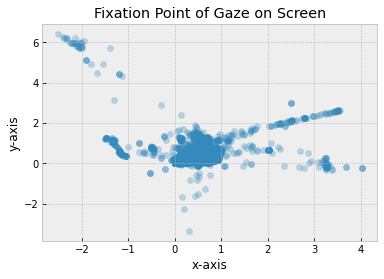

In [47]:
explain_term(['FPOGX', 'FPOGY'])

plt.scatter(df['FPOGX'],df['FPOGY'], alpha=0.3)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Fixation Point of Gaze on Screen")

Text(0.5, 1.0, 'Distribution of Fixation Point by Axes')

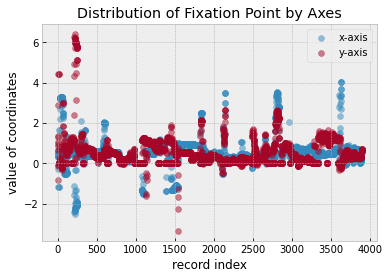

In [98]:
plt.scatter(df.index,df['FPOGX'], label="x-axis", alpha=0.5)
plt.scatter(df.index,df['FPOGY'], label="y-axis", alpha=0.5)
plt.xlabel("record index")
plt.ylabel("value of coordinates")
plt.legend()
plt.title("Distribution of Fixation Point by Axes")

The plot shows that most values lie between the range of -2-4  and therefore we can safely drop values less than -2 or bigger than 4, which may introduce unnecessary bias.

In [45]:
df = df[(df['FPOGX'] >= -2)]
df = df[(df['FPOGY'] >= -2)]
df = df[(df['FPOGX'] <= 4)]
df = df[(df['FPOGY'] <= 4)]

We plot the same graph again and observe that the data is uniform now.

Text(0.5, 1.0, 'Distribution of Fixation Point by Axes, w/t outlier')

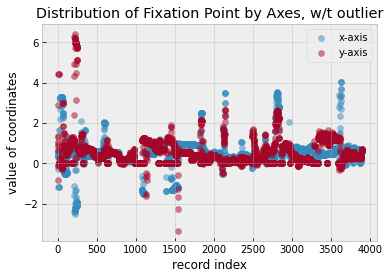

In [99]:
plt.scatter(df.index,df['FPOGX'], label="x-axis", alpha=0.5)
plt.scatter(df.index,df['FPOGY'], label="y-axis", alpha=0.5)
plt.xlabel("record index")
plt.ylabel("value of coordinates")
plt.legend()
plt.title("Distribution of Fixation Point by Axes, w/t outlier")

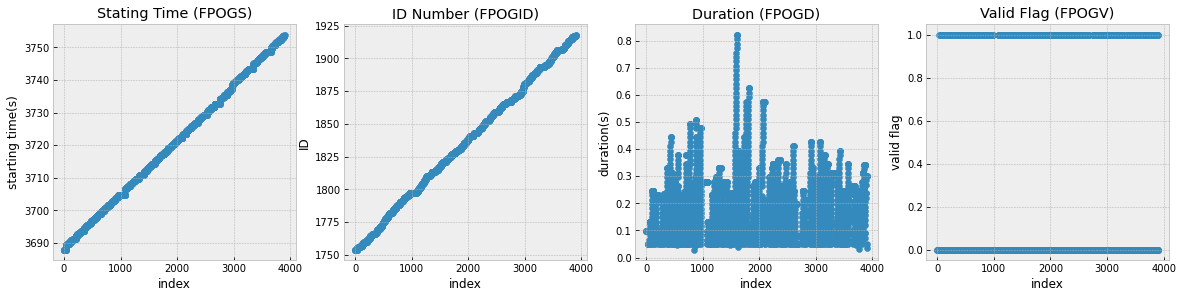

FPOGS: The starting time of fixation POG in seconds since the system initiated
FPOGID: The fixation POG ID number
FPOGD: the duration of the fixation POG in seconds
FPOGV: The FPOG valid flag is 1 for valid and 0 for not valid


In [112]:
plt.figure(figsize = (20,20))

plt.subplot(4,4,1)
plt.scatter(df.index, df.FPOGS)
plt.title('Stating Time (FPOGS)')
plt.xlabel("index")
plt.ylabel("starting time(s)")

plt.subplot(4,4,2)
plt.scatter(df.index, df.FPOGID)
plt.title('ID Number (FPOGID)')
plt.xlabel("index")
plt.ylabel("ID")

plt.subplot(4,4,3)
plt.scatter(df.index, df.FPOGD)
plt.title('Duration (FPOGD)')
plt.xlabel("index")
plt.ylabel("duration(s)")

plt.subplot(4,4,4)
plt.scatter(df.index, df.FPOGV)
plt.title('Valid Flag (FPOGV)')
plt.xlabel("index")
plt.ylabel("valid flag")
plt.show()

explain_term(["FPOGS", "FPOGID", "FPOGD", "FPOGV"])

Figures abvoe show no obvious evidence of outlier existing.

**Numerical data distribution**

In [49]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

In [51]:
# this line should actually change nothing: df_num is the same as df
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
0,3688.82373,1203285459570,0.61778,1.04122,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30657,0.57754,7.52634,1.0,1,0.67805,0.53920,8.87684,1.0,1,-0.08589,-0.00695,0.85153,0.00275,1,0.0451,-0.01172,0.85617,0.00348,1,0.32292,0.26019,0
1,3688.83984,1203285619107,0.53233,0.93970,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30639,0.57681,7.69552,1.0,1,0.67817,0.53960,8.96964,1.0,1,-0.08589,-0.00695,0.85153,0.00302,1,0.0451,-0.01172,0.85617,0.00346,1,0.32292,0.26019,0
2,3688.85620,1203285782582,0.32598,-0.82726,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.11962,-2.59421,1,0.11962,-2.59421,1,0.30570,0.57789,6.93798,1.0,1,0.67569,0.54106,9.03034,1.0,1,-0.08589,-0.00695,0.85153,0.00268,1,0.0451,-0.01172,0.85617,0.00274,1,0.32292,0.26019,0
3,3688.87231,1203285946108,0.36009,-0.14849,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30551,0.57881,7.33709,1.0,1,0.67781,0.53975,8.79860,1.0,1,-0.08589,-0.00695,0.85153,0.00279,1,0.0451,-0.01172,0.85617,0.00367,1,0.32292,0.26019,0
4,3688.88892,1203286111336,0.32542,-0.05872,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30543,0.57869,6.89567,1.0,1,0.67807,0.53987,8.71931,1.0,1,-0.08589,-0.00695,0.85153,0.00283,1,0.0451,-0.01172,0.85617,0.00374,1,0.32292,0.26019,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8712e9690>,
      dtype=object)

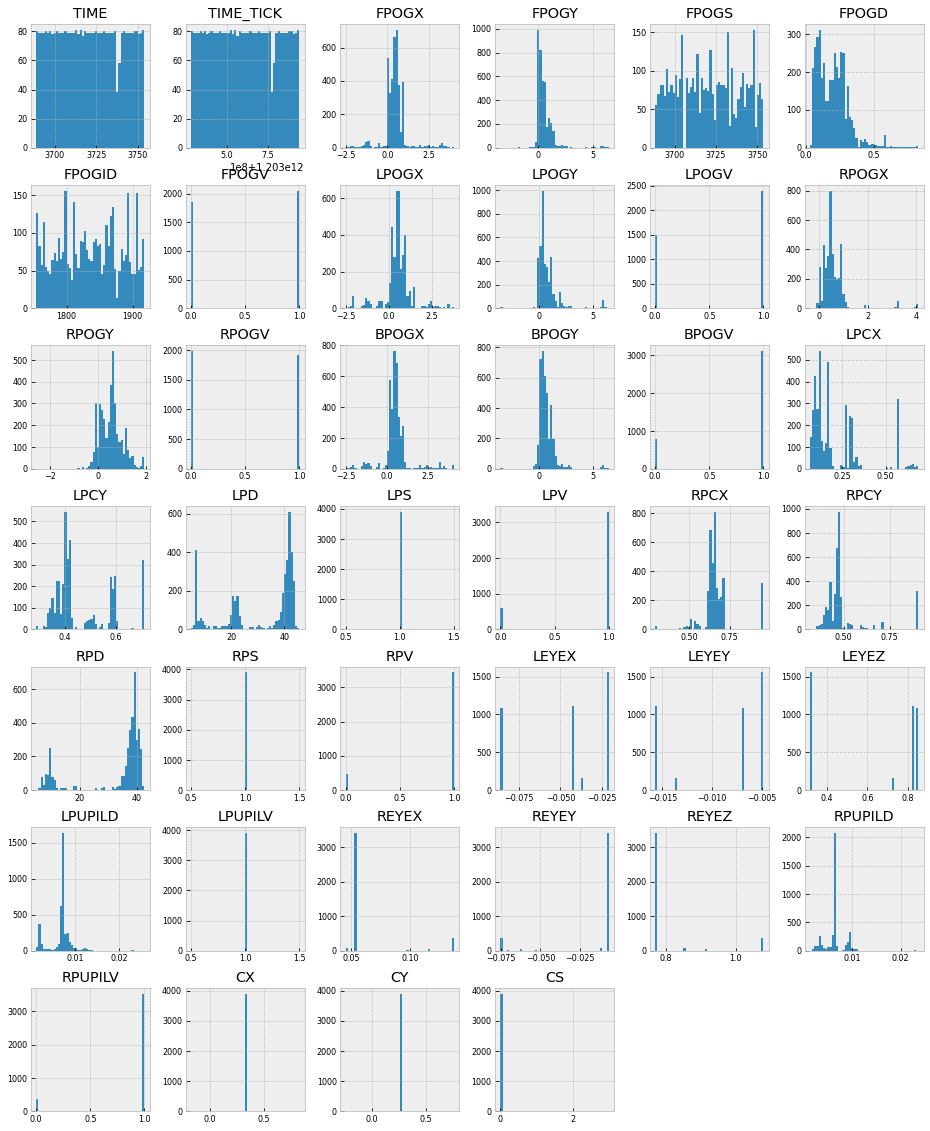

In [52]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Some features seem to share a simailar distribution (e.g., 'FPOGX' and 'LPOGX'), which can be considered together. We will use heatmap to explore there correlations further in the next section.

## Correlations

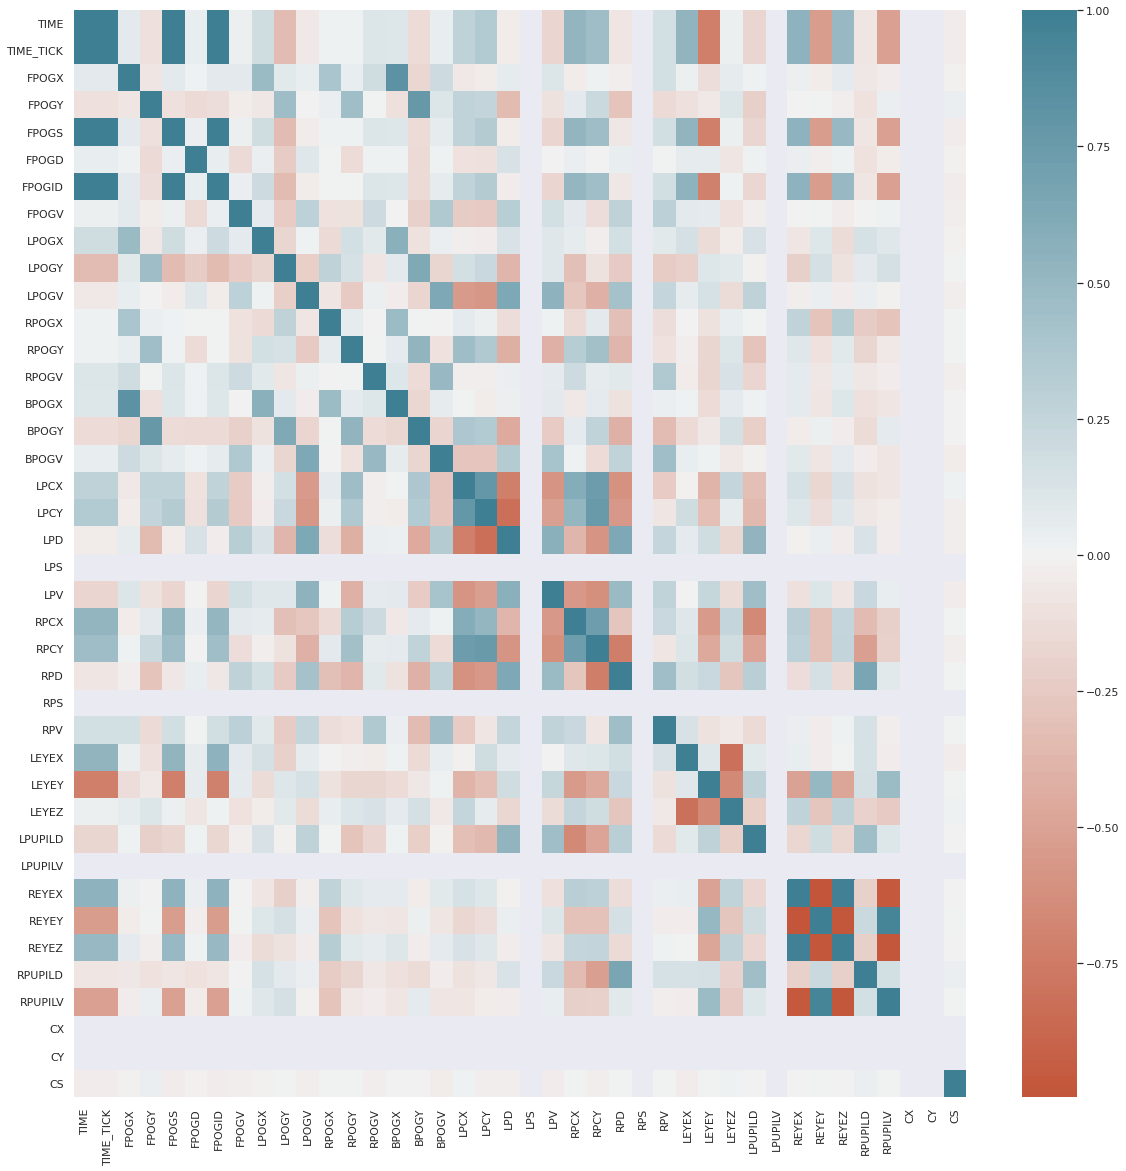

In [53]:
import seaborn as sns

corr = df_num.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.diverging_palette(20, 220, n=200),
)

In [155]:
fixation_pog_cols = df_num.loc[:, "FPOGX":"BPOGV"]
image_data_relating_to_LR_eyes_cols = df_num.loc[:, "LPCX":"RPV"]
eye_3d_cols = df_num.loc[:, "LEYEX":"RPUPILV"]

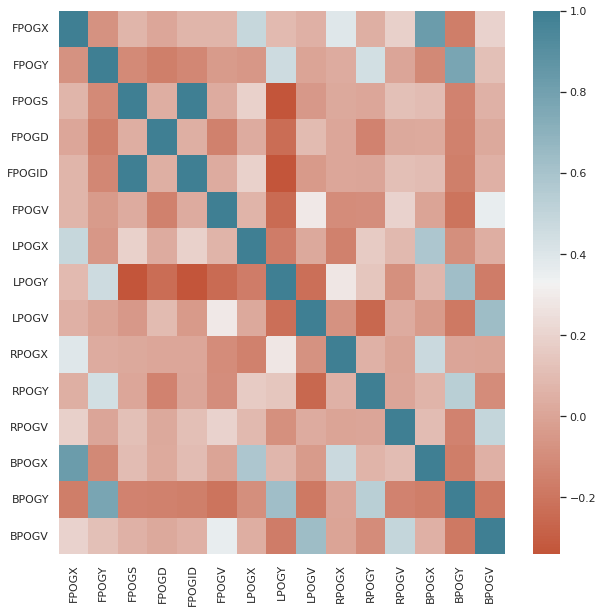

In [159]:
corr = fixation_pog_cols.corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.diverging_palette(20, 220, n=200),
)

### Observation and Analysis

**Fixation Point and Best POG**

We observe:
+ FPOGV has highest (positive) correlation with BPOGV.
+ FPOGX has highest (positive) correlation with BPOGX.
+ FPOGY has highest (positive) correlation with BPOGY

Fixation point is probably filtered, through some calculation with the raw date. We do not know how `gazepoint` calculate fixation point, but it may be closely relate to the 'best' un-filtered POG (left&right average).

**Best (Unfiltered) POG Coordinates**

The following pairs are highly correlated:
+ BPOGX and LPOGX/RPOGX
+ BPOGY and LPOGY/RPOGY

This is explanable because, as indicated in the explanation of BPOG data, the best POG is calculated through averaging unfiltered left and right POG for each coordinate.  

**Combining X and Y coordinates data**
+ For x-coordinatesm Both BPOGX and FPOGX has a slightly higher correlation with left eye's data(LPOGX) than with right eye's data(RPOGX). 

This probably indicates that the averaging calculation of both best POG and fixation POG weighs left-eye data heavier than right-eye data.


**Eyes 3d Data**

At this point, we do not found much useful information in eyes 3d data; 

Suprisingly, we observe the fixation starting time(FPOGS) and fixation ID(FPOGID) is strongly correlated with x and y coordinates of left eye with 3d space(LEYEX, LEYEY). Such correlation with the coordinates of right eye(REYEX, REYEY) is also evident, but relatively weaker.


### Further Analysis

**Analysis of BPFOG (Best Fixation Points)**

BPOG: 
The ‘best’ POG data, which is the average of the left eye and right eye POG if both are available, or if not, then the value of either the left or right eye, depending on which one is valid.
(https://www.gazept.com/dl/Gazepoint_API_v2.0.pdf)

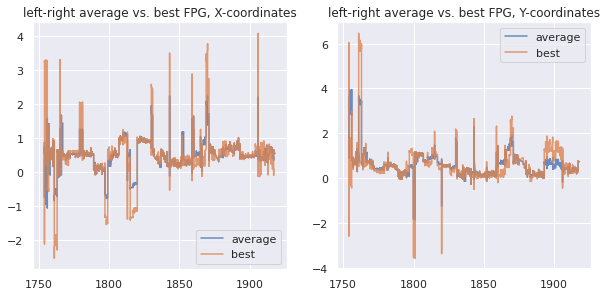

In [80]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.scatter(df_num["FPOGID"], (df_num["LPOGX"]+df_num["RPOGX"])/2, alpha=.8, label="average")
plt.scatter(df_num["FPOGID"], df_num["BPOGX"], alpha=.8, label="best")
plt.title("left-right average vs. best FPG, X-coordinates")
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df_num["FPOGID"], (df_num["LPOGY"]+df_num["RPOGY"])/2, alpha=.8, label="average")
plt.scatter(df_num["FPOGID"], df_num["BPOGY"], alpha=.8, label="best")
plt.title("left-right average vs. best FPG, Y-coordinates")
plt.legend()

In [120]:
# How many records only have one-eye(either left of right) FOG valid?
print("proportion:", len(df_num.query('(LPOGV== 0.0) != (RPOGV== 0.0)'))/ len(df_num))

df_num.query('(LPOGV== 0.0) != (RPOGV== 0.0)')


proportion: 0.48705460138426043


,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
0,3688.82373,1203285459570,0.61778,1.04122,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30657,0.57754,7.52634,1.0,1,0.67805,0.53920,8.87684,1.0,1,-0.08589,-0.00695,0.85153,0.00275,1,0.04510,-0.01172,0.85617,0.00348,1,0.32292,0.26019,0
1,3688.83984,1203285619107,0.53233,0.93970,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.38709,1.08707,1,0.38709,1.08707,1,0.30639,0.57681,7.69552,1.0,1,0.67817,0.53960,8.96964,1.0,1,-0.08589,-0.00695,0.85153,0.00302,1,0.04510,-0.01172,0.85617,0.00346,1,0.32292,0.26019,0
2,3688.85620,1203285782582,0.32598,-0.82726,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.11962,-2.59421,1,0.11962,-2.59421,1,0.30570,0.57789,6.93798,1.0,1,0.67569,0.54106,9.03034,1.0,1,-0.08589,-0.00695,0.85153,0.00268,1,0.04510,-0.01172,0.85617,0.00274,1,0.32292,0.26019,0
3,3688.87231,1203285946108,0.36009,-0.14849,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30551,0.57881,7.33709,1.0,1,0.67781,0.53975,8.79860,1.0,1,-0.08589,-0.00695,0.85153,0.00279,1,0.04510,-0.01172,0.85617,0.00367,1,0.32292,0.26019,0
4,3688.88892,1203286111336,0.32542,-0.05872,3688.03467,0.09863,1754,0,1.10823,4.34311,0,0.42832,1.20903,1,0.42832,1.20903,1,0.30543,0.57869,6.89567,1.0,1,0.67807,0.53987,8.71931,1.0,1,-0.08589,-0.00695,0.85153,0.00283,1,0.04510,-0.01172,0.85617,0.00374,1,0.32292,0.26019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,3753.68457,1203934068056,0.17734,0.30879,3753.33301,0.30225,1917,0,0.21329,0.26596,1,0.78669,0.42226,0,0.21329,0.26596,1,0.17020,0.40079,43.92559,1.0,1,0.70763,0.46700,39.08194,1.0,1,-0.04299,-0.01572,0.82182,0.00735,1,0.13716,-0.07542,1.07984,0.00642,0,0.32292,0.26019,0
3887,3753.70117,1203934232260,0.19942,0.26986,3753.33301,0.30225,1917,0,0.21329,0.26596,1,0.78669,0.42226,0,0.21329,0.26596,1,0.17035,0.40035,44.05074,1.0,1,0.70798,0.46704,39.21952,1.0,1,-0.04299,-0.01572,0.82182,0.00737,1,0.13716,-0.07542,1.07984,0.00641,0,0.32292,0.26019,0
3888,3753.71729,1203934395552,0.26162,0.28888,3753.33301,0.30225,1917,0,0.32381,0.30790,1,0.78669,0.42226,0,0.32381,0.30790,1,0.17100,0.39999,43.89145,1.0,1,0.70861,0.46695,38.98980,1.0,1,-0.04299,-0.01572,0.82182,0.00733,1,0.13716,-0.07542,1.07984,0.00640,0,0.32292,0.26019,0
3889,3753.73389,1203934559968,0.30722,0.28379,3753.33301,0.30225,1917,0,0.39843,0.27361,1,0.78669,0.42226,0,0.39843,0.27361,1,0.17146,0.40019,43.98973,1.0,1,0.70891,0.46701,38.89024,1.0,1,-0.04299,-0.01572,0.82182,0.00735,1,0.13716,-0.07542,1.07984,0.00645,0,0.32292,0.26019,0


48% of our record have either invalid left eye or invalid right eye FOG data. This is relatively high and may results in inaccurate fixation data. In later experiments, we will design testing scenarios which may help to improve this.

**Analysis of Valid Flag (FPOGV)**

In [91]:
# overall distribution
df_num["FPOGV"].value_counts()

1    2051
0    1850
Name: FPOGV, dtype: int64

In [110]:
# valid
df_valid = df_num.query("FPOGV == 1")
df_valid.describe()

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.0,2051.000000,2051.00000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.0,2051.000000,2051.000000,2051.000000,2051.000000,2051.0,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.0,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2.051000e+03,2.051000e+03,2051.0
mean,3721.527005,1.203612e+12,0.512071,0.522152,3721.346369,0.180636,1837.240371,1.0,0.554458,0.51888,0.750853,0.517895,0.491648,0.585568,0.513518,0.520372,0.935641,0.179718,0.437085,35.290540,1.0,0.902974,0.678436,0.485989,35.901233,1.0,0.971721,-0.044008,-0.008569,0.601338,0.006759,1.0,0.062267,-0.013593,0.801946,0.006499,0.910775,3.229200e-01,2.601900e-01,0.0
std,18.057095,1.805710e+08,0.513622,0.501205,18.061327,0.111730,45.143006,0.0,0.564576,0.61675,0.432624,0.321716,0.391548,0.492744,0.522717,0.512784,0.245451,0.132627,0.100513,11.832756,0.0,0.296065,0.085729,0.120176,8.878939,0.0,0.165809,0.026116,0.004685,0.257846,0.001810,0.0,0.024656,0.020544,0.088535,0.001361,0.285137,4.608549e-15,7.662407e-15,0.0
min,3689.381840,1.203291e+12,-2.167200,-0.233400,3689.332520,0.029540,1755.000000,1.0,-2.288300,-0.36526,0.000000,-0.084720,-0.645200,0.000000,-2.288300,-0.444590,0.000000,0.065810,0.303970,4.895520,1.0,0.000000,0.287400,0.316440,5.953850,1.0,0.000000,-0.085890,-0.015720,0.316580,0.001260,1.0,0.045100,-0.075420,0.769650,0.001410,0.000000,3.229200e-01,2.601900e-01,0.0
25%,3704.751100,1.203445e+12,0.307370,0.209160,3704.594970,0.098630,1797.000000,1.0,0.347395,0.22070,1.000000,0.328310,0.185220,0.000000,0.309250,0.209550,1.000000,0.100565,0.376325,36.909030,1.0,1.000000,0.634850,0.431015,37.221235,1.0,1.000000,-0.085890,-0.015720,0.316580,0.007050,1.0,0.053870,-0.006520,0.772400,0.006370,1.000000,3.229200e-01,2.601900e-01,0.0
50%,3720.366700,1.203601e+12,0.504790,0.402090,3720.087400,0.164310,1834.000000,1.0,0.562650,0.34810,1.000000,0.472050,0.505960,1.000000,0.503530,0.393190,1.000000,0.124680,0.402730,41.274810,1.0,1.000000,0.660110,0.463810,38.881810,1.0,1.000000,-0.042990,-0.006950,0.821820,0.007240,1.0,0.053870,-0.006520,0.772400,0.006510,1.000000,3.229200e-01,2.601900e-01,0.0
75%,3737.510250,1.203772e+12,0.689095,0.679185,3737.337890,0.230220,1875.000000,1.0,0.844580,0.69205,1.000000,0.717800,0.675045,1.000000,0.694780,0.674605,1.000000,0.175100,0.421425,42.201225,1.0,1.000000,0.692295,0.478180,39.740895,1.0,1.000000,-0.021120,-0.004810,0.851530,0.007400,1.0,0.053870,-0.006520,0.772400,0.006610,1.000000,3.229200e-01,2.601900e-01,0.0
max,3753.898440,1.203936e+12,3.552630,5.988020,3753.849120,0.821530,1918.000000,1.0,3.787440,6.14266,1.000000,3.276470,1.783620,1.000000,3.787440,6.142660,1.000000,0.688100,0.709090,45.601650,1.0,1.000000,0.961270,0.903970,42.242170,1.0,1.000000,-0.021120,-0.004810,0.851530,0.014270,1.0,0.137160,-0.006520,1.079840,0.010890,1.000000,3.229200e-01,2.601900e-01,0.0


In [101]:
df_invalid = df_num.query("FPOGV == 0")
df_invalid.describe()

,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,LPOGY,LPOGV,RPOGX,RPOGY,RPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,LEYEX,LEYEY,LEYEZ,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS
count,1850.000000,1.850000e+03,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.0,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.0,1850.000000,1850.000000,1850.000000,1850.000000,1850.0,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.0,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1.850000e+03,1.850000e+03,1850.000000
mean,3720.629634,1.203604e+12,0.414326,0.578247,3720.143001,0.214772,1834.141081,0.0,0.450863,1.025394,0.467027,0.629810,0.579553,0.388649,0.518252,0.852119,0.644865,0.249073,0.492593,26.852125,1.0,0.778378,0.663200,0.518318,29.335222,1.0,0.778919,-0.048042,-0.009195,0.650769,0.006847,1.0,0.062387,-0.014083,0.807532,0.006523,0.900000,3.229200e-01,2.601900e-01,0.002162
std,19.636839,1.963684e+08,0.818947,0.905075,19.629616,0.110674,49.442124,0.0,0.996045,1.315678,0.499046,0.727764,0.533809,0.487575,1.003576,1.031735,0.478684,0.156384,0.114582,13.537850,0.0,0.415450,0.113566,0.140335,13.500199,0.0,0.415087,0.026351,0.004646,0.242831,0.002933,0.0,0.025633,0.021076,0.092991,0.002539,0.300081,1.110523e-16,8.606555e-15,0.073510
min,3688.823730,1.203285e+12,-2.522150,-3.376500,3688.034670,0.049070,1754.000000,0.0,-2.533430,-3.576670,0.000000,-0.390130,-2.594210,0.000000,-2.533430,-3.576670,0.000000,0.065570,0.286690,5.218540,1.0,0.000000,0.287400,0.351400,4.875370,1.0,0.000000,-0.085890,-0.015720,0.316580,0.001390,1.0,0.045100,-0.075420,0.769650,0.001940,0.000000,3.229200e-01,2.601900e-01,0.000000
25%,3704.976990,1.203447e+12,0.000000,0.000000,3704.594970,0.098880,1797.000000,0.0,0.222625,0.265960,0.000000,0.267050,0.177230,0.000000,0.243960,0.323512,0.000000,0.121385,0.400945,16.608995,1.0,1.000000,0.627450,0.447965,11.106910,1.0,1.000000,-0.085890,-0.015720,0.316580,0.006310,1.0,0.053870,-0.006520,0.772400,0.005080,1.000000,3.229200e-01,2.601900e-01,0.000000
50%,3721.360720,1.203611e+12,0.379010,0.330065,3721.073240,0.229980,1837.000000,0.0,0.439680,0.731120,0.000000,0.472050,0.564730,0.000000,0.465525,0.710935,1.000000,0.194715,0.477700,22.675850,1.0,1.000000,0.653630,0.474525,37.410550,1.0,1.000000,-0.042990,-0.006950,0.821820,0.007260,1.0,0.053870,-0.006520,0.772400,0.006480,1.000000,3.229200e-01,2.601900e-01,0.000000
75%,3735.871580,1.203756e+12,0.593650,0.820320,3735.316890,0.279540,1871.000000,0.0,0.762250,1.239870,1.000000,0.694597,0.884850,1.000000,0.677990,1.145730,1.000000,0.304810,0.586232,41.075097,1.0,1.000000,0.678360,0.496830,39.406783,1.0,1.000000,-0.021120,-0.004810,0.851530,0.008170,1.0,0.053870,-0.006520,0.772400,0.008660,1.000000,3.229200e-01,2.601900e-01,0.000000
max,3753.882320,1.203936e+12,4.026960,6.431460,3753.333010,0.821530,1917.000000,0.0,3.505830,6.456290,1.000000,4.088490,1.942520,1.000000,4.088490,6.456290,1.000000,0.687610,0.711910,45.258790,1.0,1.000000,0.960800,0.903770,42.703750,1.0,1.000000,-0.021120,-0.004810,0.851530,0.025680,1.0,0.137160,-0.006520,1.079840,0.023570,1.000000,3.229200e-01,2.601900e-01,3.000000


Comparing basic statistics of valid and invalid fixation records, we see that validity of both left and right eyes(LPOGV, RPOGV) is much higher in valid fixation. Besides that, we are not able to conclude which features have heavier effect on fixation's valid flags.

We try to search for qualification of "valid" flag, or FPOGV. Our guesses include:
+ fixation valid if either left or right flag valid
+ fixation valid if both left and right flag valid
+ fixation valid if duration above certain threshold

However, the test result below shows none of the above guess is correct:
+ 132 records with "valid" flag have both left and right flags invalid.
+ 1229 records with "valid" flag have either left or right flag invalid.
+ Fixation duration seems unrelated to fixation valid flag. The distributions are similar in "valid" and "invalid" portion of data, with no disparity in range.

Thus, the qualification for fixation validity requires further analysis and discussion. 

In [112]:
# fixation flag valid, but left or right flag invalid
print("either eye invalid", len(df_valid.query("LPOGV ==0 or RPOGV==0")))

# fixation flag valid, but both left and right flag invalid
print("both eye invalid", len(df_valid.query("LPOGV ==0 and RPOGV==0")))

either eye invalid 1229
both eye invalud 132


Text(0.5, 0, 'Fixation duration(seconds)')

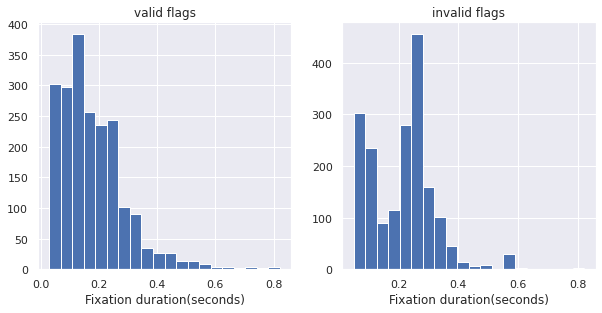

In [119]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.hist(df_valid["FPOGD"], bins=20)
plt.title("valid flags")
plt.xlabel("Fixation duration(seconds)")

plt.subplot(2,2,2)
plt.hist(df_invalid["FPOGD"], bins=20)
plt.title("invalid flags")
plt.xlabel("Fixation duration(seconds)")
